<a href="https://colab.research.google.com/github/lescardone/deep-learning-project/blob/main/CNN_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, shutil
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/grive/My Drive/Metis/Deep-Learning/deep-learning-project/photos/uncompressed'

In [3]:
# The directory where we will
# store our smaller dataset
base_dir = '/content/grive/My Drive/Metis/Deep-Learning/deep-learning-project/photos/small'
# os.mkdir(base_dir)

In [4]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [5]:
# Directory with our training smiling pictures
train_happy_dir = os.path.join(train_dir, 'happy')
# os.mkdir(train_happy_dir)

# Directory with our training sad pictures
train_sad_dir = os.path.join(train_dir, 'sad')
# os.mkdir(train_sad_dir)

# Directory with our validation smiling pictures
validation_happy_dir = os.path.join(validation_dir, 'happy')
# os.mkdir(validation_happy_dir)

# Directory with our validation sad pictures
validation_sad_dir = os.path.join(validation_dir, 'sad')
# os.mkdir(validation_sad_dir)

# Directory with our test smiling pictures
test_happy_dir = os.path.join(test_dir, 'happy')
# os.mkdir(test_happy_dir)

# Directory with our test sad pictures
test_sad_dir = os.path.join(test_dir, 'sad')
# os.mkdir(test_sad_dir)

In [ ]:
# Copy first 500 happy images to train_happy_dir
fnames = ['happy_{}.jpg'.format(i) for i in range(500)]
original_happy = os.path.join(original_dataset_dir, 'all_happy')
for fname in fnames:
    src = os.path.join(original_happy, fname)
    dst = os.path.join(train_happy_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy next 300 happy images to validation_happy_dir
fnames = ['happy_{}.jpg'.format(i) for i in range(500, 800)]
for fname in fnames:
    src = os.path.join(original_happy, fname)
    dst = os.path.join(validation_happy_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 300 images to test_happy_dir
fnames = ['happy_{}.jpg'.format(i) for i in range(800,1141)]
for fname in fnames:
    src = os.path.join(original_happy, fname)
    dst = os.path.join(test_happy_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy first 500 sad images to train_sad_dir
fnames = ['sad_{}.jpg'.format(i) for i in range(500)]
original_sad = os.path.join(original_dataset_dir, 'all_sad')
for fname in fnames:
    src = os.path.join(original_sad, fname)
    dst = os.path.join(train_sad_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 300 sad images to validation_sad_dir
fnames = ['sad_{}.jpg'.format(i) for i in range(500, 800)]
for fname in fnames:
    src = os.path.join(original_sad, fname)
    dst = os.path.join(validation_sad_dir, fname)
    shutil.copyfile(src, dst)
   

In [ ]:
 # Copy next 300 sad images to test_sad_dir
fnames = ['sad_{}.jpg'.format(i) for i in range(800, 1111)]
for fname in fnames:
    src = os.path.join(original_sad, fname)
    dst = os.path.join(test_sad_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=15)

Epoch 1/10
25/25 [==============================] - 30s 1s/step - loss: 0.5950 - acc: 0.6720 - val_loss: 0.6255 - val_acc: 0.6200
Epoch 2/10
25/25 [==============================] - 30s 1s/step - loss: 0.5597 - acc: 0.7140 - val_loss: 0.6935 - val_acc: 0.6000
Epoch 3/10
25/25 [==============================] - 30s 1s/step - loss: 0.5743 - acc: 0.7040 - val_loss: 0.6300 - val_acc: 0.6500
Epoch 4/10
25/25 [==============================] - 30s 1s/step - loss: 0.5551 - acc: 0.7260 - val_loss: 0.6884 - val_acc: 0.5900
Epoch 5/10
25/25 [==============================] - 30s 1s/step - loss: 0.5606 - acc: 0.7060 - val_loss: 0.6821 - val_acc: 0.6100
Epoch 6/10
25/25 [==============================] - 30s 1s/step - loss: 0.5236 - acc: 0.7420 - val_loss: 0.6436 - val_acc: 0.6200
Epoch 7/10
25/25 [==============================] - 30s 1s/step - loss: 0.5295 - acc: 0.7740 - val_loss: 0.6555 - val_acc: 0.6233
Epoch 8/10
25/25 [==============================] - 30s 1s/step - loss: 0.5338 - acc: 0.75

In [ ]:
cd /content/grive/My Drive/Metis/Deep-Learning/deep-learning-project/photos/

/content/grive/My Drive/Metis/Deep-Learning/deep-learning-project/photos


In [ ]:
model.save('happy_and_sad_small_1.h5')

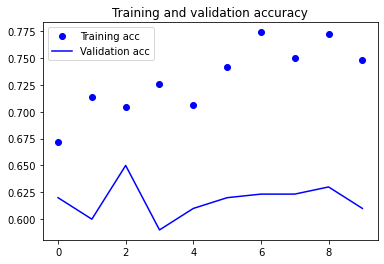

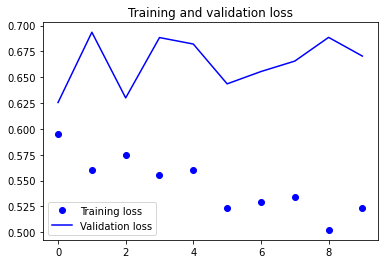

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('./training_and_val_accuracy.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./training_and_val_loss.png')

plt.show()

Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

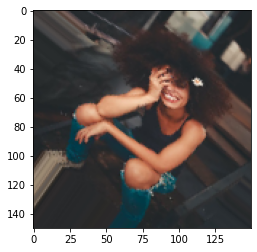

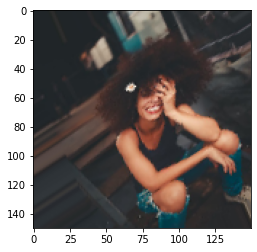

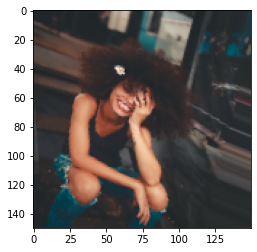

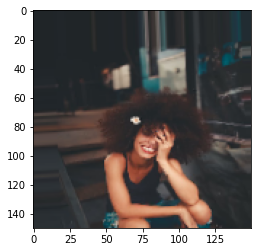

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_happy_dir, fname) for fname in os.listdir(train_happy_dir)]

# We pick one image to "augment"
img_path = fnames[2]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 1000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:

history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=15)

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 0.6877 - acc: 0.5361 - val_loss: 0.6785 - val_acc: 0.5688
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 0.6824 - acc: 0.5657 - val_loss: 0.6692 - val_acc: 0.5792
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 0.6610 - acc: 0.6160 - val_loss: 0.6760 - val_acc: 0.5604
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.6548 - acc: 0.6224 - val_loss: 0.6843 - val_acc: 0.5833
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.6515 - acc: 0.6044 - val_loss: 0.6407 - val_acc: 0.6375
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.6350 - acc: 0.6288 - val_loss: 0.6149 - val_acc: 0.6562
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.6409 - acc: 0.6392 - val_loss: 0.6144 - val_acc: 0.6646
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.6211 - acc: 0.65

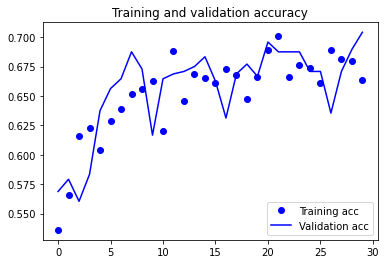

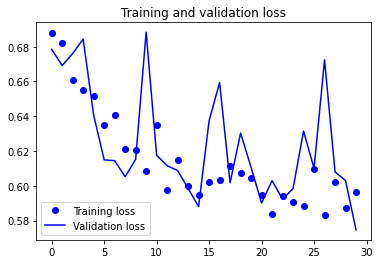

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()